In [3]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [4]:
# Đường dẫn tương đối tới file CSV
current_dir = os.getcwd()
file_path = os.path.join(current_dir, 'data_linear.csv')

df = pd.read_csv(file_path)
print(df)

    Diện tích       Giá
0     30.0000   448.524
1     32.4138   509.248
2     34.8276   535.104
3     37.2414   551.432
4     39.6552   623.418
5     42.0690   625.992
6     44.4828   655.248
7     46.8966   701.377
8     49.3103   748.918
9     51.7241   757.881
10    54.1379   831.004
11    56.5517   855.409
12    58.9655   866.707
13    61.3793   902.545
14    63.7931   952.261
15    66.2069   995.531
16    68.6207  1069.780
17    71.0345  1074.420
18    73.4483  1103.880
19    75.8621  1138.690
20    78.2759  1153.130
21    80.6897  1240.270
22    83.1034  1251.900
23    85.5172  1287.970
24    87.9310  1320.470
25    90.3448  1374.920
26    92.7586  1410.160
27    95.1724  1469.690
28    97.5862  1478.540
29   100.0000  1515.280


In [5]:
data = df.values

Xây dựng Linear Regression sử dụng công thức

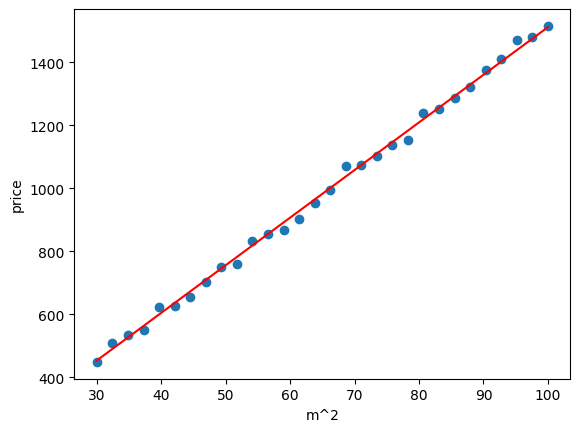

House price for 50m^2 using formula is:  755.6826304680484


In [6]:
#Chuẩn hoá dữ liệu
N = data.shape[0]
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)
#Trực quan hoá dữ liệu
plt.scatter(x, y)
plt.xlabel('m^2')
plt.ylabel('price')
x = np.hstack((np.ones((N, 1)), x))
w = np.array([0.,1.]).reshape(-1,1)
numOfIteration = 100
cost = np.zeros((numOfIteration,1))
learning_rate = 0.00001
for i in range(0, numOfIteration):
    r = np.dot(x, w) - y
    cost[i] = 0.5*np.sum(r*r)
    w[0] -= learning_rate*np.sum(r)
    # correct the shape dimension
    w[1] -= learning_rate*np.sum(np.multiply(r, x[:, 1].reshape(-1, 1)))

predict = np.dot(x, w)
plt.plot((x[0][1], x[N-1][1]),(predict[0], predict[N-1]), 'r')
plt.show()

x1 = 50
y1 = w[0] + w[1] * x1
print('House price for 50m^2 using formula is: ', y1[0])

Xây dựng Linear Regression sử dụng thư viện scikit-learn

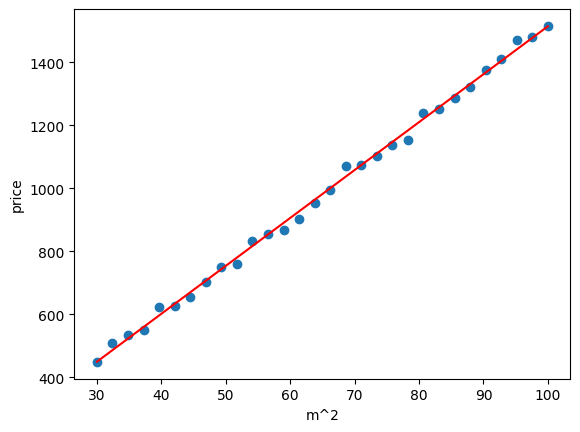

In [7]:
# LinearRegression với thư viện sklearn
from sklearn.linear_model import LinearRegression
data = pd.read_csv('data_linear.csv').values
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)
# Trực quan hoá dữ liệu
plt.scatter(x, y)
plt.xlabel('m^2')
plt.ylabel('price')
# Tạo mô hình hồi quy tuyến tính
lrg = LinearRegression()
# Train mô hình với data giá đất
lrg.fit(x, y)
y_pred = lrg.predict(x)

plt.plot((x[0], x[-1]),(y_pred[0], y_pred[-1]), 'r')
plt.show()

In [8]:
# Dự đoán giá nhà 
x_test = [[50]]
y_pred = lrg.predict(x_test)

print('House price for 50m^2 using library is: ', y_pred[0][0])

House price for 50m^2 using library is:  753.490271338277
